# k-means

In [35]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [36]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [37]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [38]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

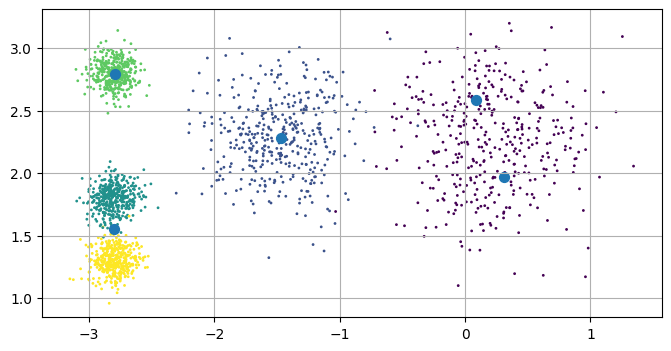

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

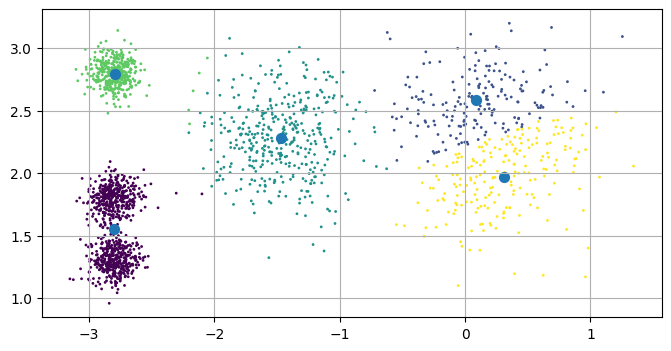

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

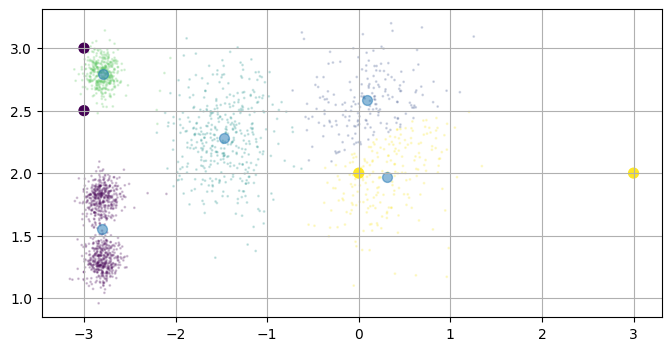

In [51]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
y_new = kmeans.predict(X_new)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, c=y_new)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, alpha=0.5)
plt.grid()

plt.show()

## Centroid initialization methods

In [55]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [ 1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

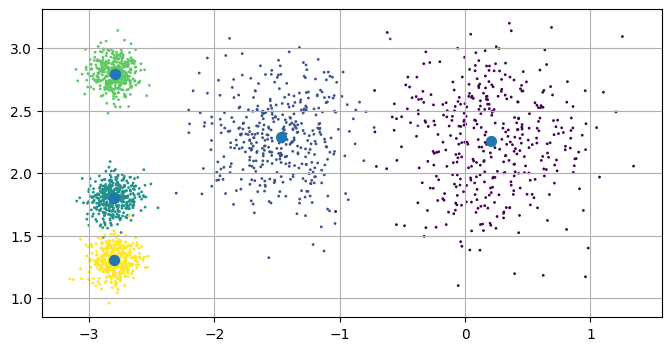

In [56]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

In [57]:
kmeans.inertia_

211.59853725816836

In [58]:
kmeans.score(X)

-211.59853725816836

## Accelerated k-means and mini-batch k-means

In [59]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

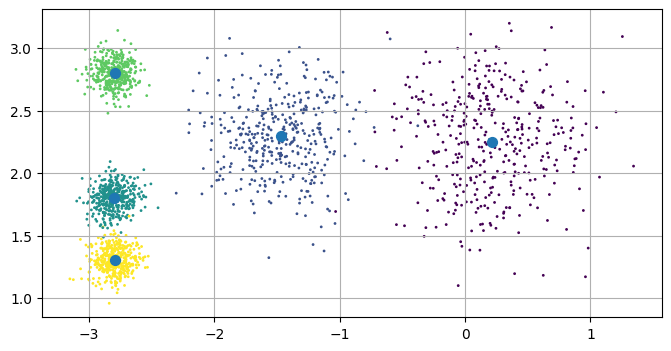

In [60]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

## Finding the optimal number of clusters

In [61]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

# Using clustering for image segmentation

In [69]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [70]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)